In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [2]:
dataset_path = 'completedataset'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
all_targets.remove('_background_noise_')
print(all_targets)

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero']


In [3]:
feature_sets_path = 'data'
feature_sets_filename = 'all_targets_mfcc_sets.npz'
model_filename = 'stop.h5'
wake_word = 'stop'

In [4]:
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))# Load feature sets
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [5]:
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']
# Assigning feature sets

In [6]:
print(x_train.shape)  #Checking the dimensions
print(x_val.shape)
print(x_test.shape)
print(y_val)

(77541, 16, 16)
(9678, 16, 16)
(9637, 16, 16)
[12.  1.  1. ... 17.  6. 29.]


In [7]:
wake_word_index = all_targets.index(wake_word)    # Convert ground truth arrays to one wake word (1) and 'other' (0)

y_train = np.equal(y_train, wake_word_index).astype('float64')
y_val = np.equal(y_val, wake_word_index).astype('float64')
y_test = np.equal(y_test, wake_word_index).astype('float64')

In [8]:
with np.printoptions(threshold=np.inf):
    print(y_val)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [9]:

print(sum(y_val) / len(y_val))
print(1 - sum(y_val) / len(y_val))

0.03606116966315354
0.9639388303368465


In [10]:
print(x_train.shape)

(77541, 16, 16)


In [11]:
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(77541, 16, 16, 1)
(9678, 16, 16, 1)
(9637, 16, 16, 1)


In [12]:
sample_shape = x_test.shape[1:]# Input shape for CNN is size of MFCC of 1 sample

print(sample_shape)

(16, 16, 1)


In [13]:
model = models.Sequential() #Model Training
model.add(layers.Conv2D(32, 
                        (2, 2), 
                        activation='relu',
                        input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classification
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [16]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

Epoch 1/30
776/776 [==============================] - 7s 9ms/step - loss: 0.1154 - acc: 0.9666 - val_loss: 0.0827 - val_acc: 0.9771
Epoch 2/30
776/776 [==============================] - 7s 9ms/step - loss: 0.0770 - acc: 0.9758 - val_loss: 0.0893 - val_acc: 0.9748
Epoch 3/30
776/776 [==============================] - 9s 11ms/step - loss: 0.0660 - acc: 0.9790 - val_loss: 0.0729 - val_acc: 0.9785
Epoch 4/30
776/776 [==============================] - 9s 12ms/step - loss: 0.0581 - acc: 0.9819 - val_loss: 0.0564 - val_acc: 0.9817
Epoch 5/30
776/776 [==============================] - 11s 14ms/step - loss: 0.0542 - acc: 0.9833 - val_loss: 0.0486 - val_acc: 0.9852
Epoch 6/30
776/776 [==============================] - 12s 15ms/step - loss: 0.0486 - acc: 0.9848 - val_loss: 0.0546 - val_acc: 0.9828
Epoch 7/30
776/776 [==============================] - 11s 14ms/step - loss: 0.0472 - acc: 0.9852 - val_loss: 0.0448 - val_acc: 0.9870
Epoch 8/30
776/776 [==============================] - 11s 14ms/step 

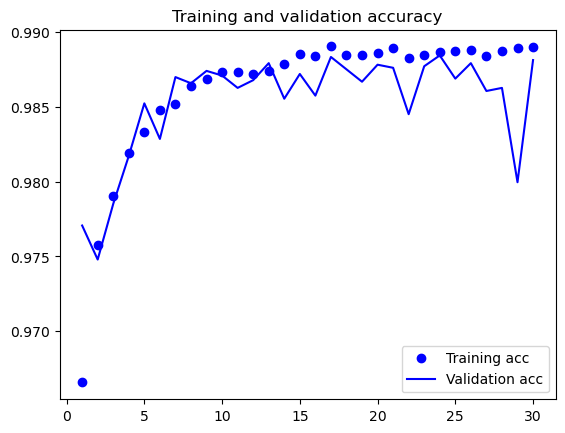

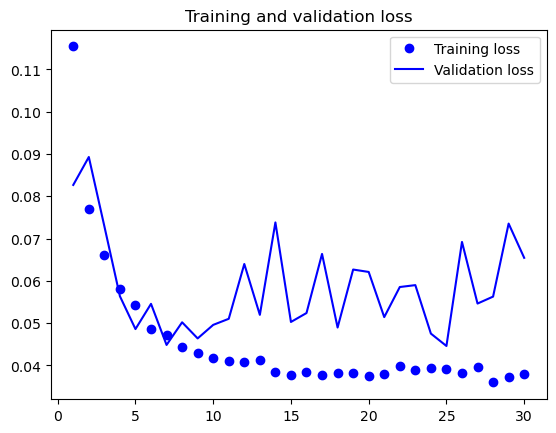

In [17]:
#Results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
models.save_model(model, model_filename)

In [19]:
for idx, y in enumerate(y_test):   # See which are 'left'
    if y == 1:
        print(idx)

63
66
116
157
165
173
182
226
313
347
359
361
384
395
406
408
502
576
585
612
622
625
628
632
642
668
697
705
720
724
744
748
754
769
770
860
871
884
937
980
991
995
1062
1086
1139
1149
1178
1181
1215
1232
1247
1284
1300
1301
1337
1342
1347
1361
1371
1375
1398
1401
1410
1477
1481
1644
1683
1688
1692
1706
1720
1752
1757
1816
1823
1865
1868
1872
1891
1921
1928
1935
1958
1982
2059
2073
2079
2105
2126
2127
2148
2150
2173
2174
2196
2291
2309
2312
2314
2326
2333
2359
2364
2379
2393
2401
2406
2463
2464
2465
2481
2508
2533
2596
2605
2610
2627
2663
2757
2796
2813
2828
2835
2881
2884
2890
2945
2970
2977
2988
3037
3073
3098
3125
3167
3177
3194
3230
3242
3245
3323
3331
3336
3349
3356
3359
3378
3417
3466
3499
3540
3546
3606
3616
3618
3621
3632
3643
3669
3687
3719
3724
3745
3751
3774
3840
3855
3885
3912
3914
3931
3949
3953
3981
3983
4003
4035
4058
4059
4063
4077
4141
4194
4223
4364
4399
4402
4429
4484
4485
4508
4520
4568
4575
4582
4587
4599
4640
4775
4921
4972
4985
4987
5011
5036
5067
5105
5180
5186

In [20]:
model = models.load_model(model_filename)
#Load model and run it against test set
for i in range(100, 110):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

1/1 [==============================] - 0s 149ms/step
Answer: 0.0  Prediction: [[3.0165516e-08]]
1/1 [==============================] - 0s 25ms/step
Answer: 0.0  Prediction: [[1.8614167e-15]]
1/1 [==============================] - 0s 33ms/step
Answer: 0.0  Prediction: [[0.00359313]]
1/1 [==============================] - 0s 25ms/step
Answer: 0.0  Prediction: [[2.9720488e-07]]
1/1 [==============================] - 0s 24ms/step
Answer: 0.0  Prediction: [[3.0104023e-11]]
1/1 [==============================] - 0s 21ms/step
Answer: 0.0  Prediction: [[3.59826e-27]]
1/1 [==============================] - 0s 26ms/step
Answer: 0.0  Prediction: [[8.082175e-06]]
1/1 [==============================] - 0s 31ms/step
Answer: 0.0  Prediction: [[6.4951096e-12]]
1/1 [==============================] - 0s 25ms/step
Answer: 0.0  Prediction: [[5.287943e-09]]
1/1 [==============================] - 0s 25ms/step
Answer: 0.0  Prediction: [[7.251623e-05]]


In [21]:
model.evaluate(x=x_test, y=y_test)

302/302 [==============================] - 1s 3ms/step - loss: 0.0636 - acc: 0.9877


[0.06357822567224503, 0.9876517653465271]